In [1]:
#!pip install gensim
#!pip install jieba
#!pip install underthesea

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
#from gensim import corpora, models, similarities
import jieba
import re

In [3]:
with open('files/vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

# Underthesea
#### word_tokenize, pos_tag, sent_tokenize
- link: https://github.com/undertheseanlp/underthesea

In [4]:
df1= pd.read_csv("project2_shopee_final.csv",index_col=0, encoding="utf-8").astype(str)

In [5]:
df1.head(2)

,product_id,product_name,category,sub_category,link,image,price,rating,description
0,231475,Bộ Quần Áo Thể Thao Thời Trang Nam Q5SHOP Form...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/B%E1%BB%99-Qu%E1%BA%A7n-%C3%...,https://cf.shopee.vn/file/e96fe533edf419d544c7...,79000.0,4.9,giới thiệu quần áo kết hình ảnh chụp không đền...
1,232886,SÉT ĐỒ THỂ THAO NAM🚗 MẪU MONTER ĐỘC ĐÁO HÀNG B...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/S%C3%89T-%C4%90%E1%BB%92-TH%...,https://cf.shopee.vn/file/b76fe4944cb0b0e6bb96...,59000.0,4.7,quần áo thể dãn mùa hè chất lạnh mẫu bảng sét ...


In [6]:
df = pd.DataFrame(df1, columns =['description'])

In [7]:
# bug_ can not decode with float, should include .astype(str) when read csv file
# word_tokenize
df["description_wt"]=df['description'].apply(lambda x: word_tokenize(x, format="text"))

In [8]:
df.head(2)

,description,description_wt
0,giới thiệu quần áo kết hình ảnh chụp không đền...,giới_thiệu quần_áo kết hình_ảnh chụp không đền...
1,quần áo thể dãn mùa hè chất lạnh mẫu bảng sét ...,quần_áo thể dãn mùa hè chất lạnh mẫu bảng sét ...


In [9]:
df["description_wt"][0]

'giới_thiệu quần_áo kết hình_ảnh chụp không đền tiền gấp hình hoàn tiền sản_phẩm không mô_tả kết hàng mặc không màu không xù lông giặt máy thoải_mái freeship tất đơn hàng không hàng hà nội freeship không liên_hệ hướng mặc tập gái học chất_liệu vải áo_quần vải cotton thoáng mát túi túi thiết_kế đẹp_mắt chống đồ thấm hút mồ_hôi thoáng mát dãn tốt set sản_phẩm quần_đùi áo_cộc bảng lựa bảng thông thể'

# Cosine_similarity
- link https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
- link https://en.wikipedia.org/wiki/Cosine_similarity
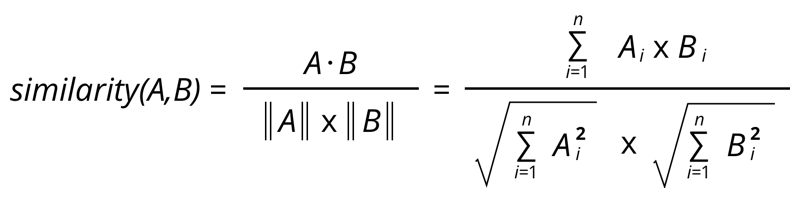

In [10]:
from numpy import dot
from numpy.linalg import norm
X = [(1,2),(3,4),(5,6)]
Y = [(2,2),(3,4)]
cos_sim = dot(X,Y) / (norm(X)*norm(Y))
print(cos_sim)

[[0.14598637 0.18248297]
 [0.32846934 0.40146253]
 [0.51095231 0.62044209]]


In [11]:
tf = TfidfVectorizer(analyzer='word', stop_words=stop_words)

In [12]:
tfidf_matrix = tf.fit_transform(df.description_wt)

In [13]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [14]:
cosine_similarities

array([[1.        , 0.23715234, 0.1154894 , ..., 0.04813754, 0.22375082,
        0.06417766],
       [0.23715234, 1.        , 0.09751128, ..., 0.063971  , 0.0943373 ,
        0.11413842],
       [0.1154894 , 0.09751128, 1.        , ..., 0.06512763, 0.05574878,
        0.06238258],
       ...,
       [0.04813754, 0.063971  , 0.06512763, ..., 1.        , 0.11351674,
        0.08980857],
       [0.22375082, 0.0943373 , 0.05574878, ..., 0.11351674, 1.        ,
        0.08834885],
       [0.06417766, 0.11413842, 0.06238258, ..., 0.08980857, 0.08834885,
        1.        ]])

In [15]:
cosine_similarities.shape

(17771, 17771)

### Buil Recommdation - product based

In [16]:
### create sub_list
list_sub = df1['sub_category'].unique().tolist()
df1['sub_category_id'] = df1['sub_category'].map(lambda x: list_sub.index(x) +1)
df1['item_id'] = df1.apply(lambda x: int(str(x['product_id']) + str(x['sub_category_id']).zfill(2)), axis=1)
df1.head(3)

,product_id,product_name,category,sub_category,link,image,price,rating,description,sub_category_id,item_id
0,231475,Bộ Quần Áo Thể Thao Thời Trang Nam Q5SHOP Form...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/B%E1%BB%99-Qu%E1%BA%A7n-%C3%...,https://cf.shopee.vn/file/e96fe533edf419d544c7...,79000.0,4.9,giới thiệu quần áo kết hình ảnh chụp không đền...,1,23147501
1,232886,SÉT ĐỒ THỂ THAO NAM🚗 MẪU MONTER ĐỘC ĐÁO HÀNG B...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/S%C3%89T-%C4%90%E1%BB%92-TH%...,https://cf.shopee.vn/file/b76fe4944cb0b0e6bb96...,59000.0,4.7,quần áo thể dãn mùa hè chất lạnh mẫu bảng sét ...,1,23288601
2,231261,Đồ Bộ hè nam 🚚 FREESHIP 🚚 Quần áo thể thao nam...,Thời Trang Nam,Đồ Bộ,https://shopee.vn/%C4%90%E1%BB%93-B%E1%BB%99-h...,https://cf.shopee.vn/file/b00adb38c9ec0584a434...,49000.0,4.7,ớng cân cân chất liệu vải mè thái giãn thoải m...,1,23126101


In [17]:
### create a a dict to get 5 similar products
results = {}

for idx, row in df1.iterrows():    
    similar_indices = cosine_similarities[idx].argsort()[-6:-1]
    # similar_items = [(data_result[idx][i]) for i in similar_indices]
    similar_items = [(cosine_similarities[idx][i], df1['item_id'][i]) for i in similar_indices]
    # print(similar_items[0:])
    results[row['item_id']] = similar_items[:]

In [18]:
### get product_name by input product_id
def item_name(product_id):
    return df1.loc[df1['item_id'] == product_id]['product_name'].to_list()[0].split('-')[0]
### get product recommended
def recommend(item_id, num):
    print('Recommend ' + str(num) + ' products similar to ' + item_name(item_id) + '....result below')
    print('-----')
    
    recs = results[item_id][:num]
    for rec in recs:
        print(rec[1])
        print('recommended product id:' + str(rec[1]) + ', ' + item_name(rec[1]) + '(score: )' + str(rec[0]) + ')')

In [19]:
#### try to recommend a product_id: 232886, with sub_id: 01, and 5 similar products
recommend(23288601,5)

Recommend 5 products similar to SÉT ĐỒ THỂ THAO NAM🚗 MẪU MONTER ĐỘC ĐÁO HÀNG BAO ĐẸP. FREEship....result below
-----
23317401
recommended product id:23317401, Sét Bộ Quần Áo Thể Thao Kẻ Sọc Cực Chất Cao Cấp, Áo Thun Cổ Tròn Ngắn Tay (score: )0.5801808285169417)
16226602
recommended product id:16226602, [Có sẵn] Bộ Hè (score: )0.6128439592047839)
23463701
recommended product id:23463701, Bộ thể thao nam hè NY phối nâu, Bộ nam thể thao hè NY thun lạnh không xù form dáng trẻ trung(score: )0.6212948962161264)
1663702
recommended product id:1663702, BỘ thể thao nam nữ mẫu thun lạnh ETRENITEST mã ET(score: )0.923302359894251)
23322101
recommended product id:23322101, Nguyên bộ thể thao nam mẫu mới phong cách hàn quốc,🚛FREE SHIP🚛,(score: )1.0000000000000002)


### Recommendation content based

In [58]:
### 
user_input = input('what are you looking for: ')

what are you looking for: áo Thun NGắn tay màu TRắng, vải Cotton


In [21]:
### clean user_input 
def pre_process(text):
    from underthesea import word_tokenize, pos_tag, sent_tokenize
    import re
    import regex
    
    user_input = re.sub('[\.\:\,\-\+\d\!\%\...\"\*\>\<\^\&\/\[\]\(\)\=\~\#]', ' ', text)
    user_input = regex.sub(r'\s+', ' ', user_input).strip()
    
    def loaddicchar():
            uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
            unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

            dic = {}
            char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
                '|')
            charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
                '|')
            for i in range(len(char1252)):
                dic[char1252[i]] = charutf8[i]
            return dic
         
        # 
    def covert_unicode(txt):
            dicchar = loaddicchar()
            return regex.sub(
                r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
                lambda x: dicchar[x.group()], txt)
                
    user_input = covert_unicode(user_input)
    user_input = word_tokenize(user_input, format="text")
    user_input = user_input.lower()
    
    return user_input

In [87]:
### funct to compute similarity
def user_input_processing(list1):
    
    ### bug terable over raw text documents expected, string object received
    ### Input should be in Square Brackets.
    list_process = [pre_process(list1)]
    tf_matrix2 = tf.transform(list_process)
    
    cosine2 = cosine_similarity(tfidf_matrix, tf_matrix2)
    
    ### to dataframe and get indices
    df_user = pd.DataFrame(cosine2)
    df_top5 = df_user.sort_values(by=[0],ascending=False)[:5]
    list_index = df_top5.index.values.tolist()
    
    return list_process, cosine2, list_index, df_top5

In [90]:
list_process, cosine2, list_index, df_top5 = user_input_processing(user_input)

In [91]:
### print user_input after clean_process
print('User input: ',user_input)
print('After clean process: ', list_process)

User input:  áo Thun NGắn tay màu TRắng, vải Cotton
After clean process:  ['áo_thun ngắn tay màu trắng vải cotton']


In [98]:
### sort result of cosine then get 5 top value
np.sort(cosine2,axis=0)[::-1][:5]

array([[0.53067313],
       [0.50564654],
       [0.50564654],
       [0.44408642],
       [0.43938751]])

In [95]:
#### recommeded index
list_index

[12005, 4769, 17502, 13225, 11933]

In [96]:
### get row from a list index
df_recommend = df1.iloc[list_index]
df_recommend.reset_index(drop=True, inplace=True)

In [97]:
### return a dataframe of recommended items 
df_recommend

,product_id,product_name,category,sub_category,link,image,price,rating,description,sub_category_id,item_id
0,26579,"Đồ ngủ nam, tay ngắn, tất - Hàng nhập khẩu",Thời Trang Nam,Đồ Ngủ,https://shopee.vn/%C4%90%E1%BB%93-ng%E1%BB%A7-...,nan,607300.0,0.0,ên hệ hàng cổ áo cổ tròn áo kiểu tiết độ phù h...,12,2657912
1,241187,TAI NGHE Silver.crest,Thời Trang Nam,Đồ Hóa Trang,https://shopee.vn/TAI-NGHE-Silver.crest-i.1593...,https://cf.shopee.vn/file/ba857396a70961afe7dd...,323000.0,5.0,màu đen trắng màu đen trắng màu đen trắng màu ...,5,24118705
2,22670,Áo tê vịt quack quack đen - trắng,Thời Trang Nam,Áo Vest và Blazer,https://shopee.vn/%C3%81o-t%C3%AA-v%E1%BB%8Bt-...,nan,155000.0,5.0,màu đen trắng,17,2267017
3,201173,Áo thun tay dài thời trang năng động khi chơi ...,Thời Trang Nam,"Áo Hoodie, Áo Len & Áo Nỉ",https://shopee.vn/%C3%81o-thun-tay-d%C3%A0i-th...,https://cf.shopee.vn/file/282d2fedc27ab8885547...,77000.0,4.5,ời hàng dự kiến sản phẩm vải chất liệu sợi hàm...,13,20117313
4,261127,☃▦✳Bộ Đồ Ngủ 100% Cotton Tay Ngắn Phong Cách H...,Thời Trang Nam,Đồ Ngủ,https://shopee.vn/%E2%98%83%E2%96%A6%E2%9C%B3B...,https://cf.shopee.vn/file/e48626ec94d6b52b12d0...,573000.0,0.0,hàng tỉnh quảng đông vải cotton chất liệu vải ...,12,26112712
